# Chapter 8 - Exercise 1
### Author: *John Benedick Estrada*
---
**Exercise:** To test whether the distributions of `T` and `S` are heavy-tailed, we plotted their `Pmf` on a log-log scale, which is what Bak, Tang and Wiesenfeld show in their paper.  But as we saw in Chapter 4, this visualization can obscure the shape of the distribution.  Using the same data, make a plot that shows the CDFs of `S` and `T`.  What can you say about the shape of these distributions?  Do they follow a power law?  Are they heavy tailed?

You might find it helpful to plot the CDFs on a log-x scale and on a log-log scale.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from utils import decorate
from empiricaldist import Cdf, Pmf
from Sand import SandPile

##### Regenerate the Sand Pile data in Think Complexity 2nd Edition: Chapter 8
Code source: https://github.com/AllenDowney/ThinkComplexity2/blob/master/notebooks/chap08.ipynb

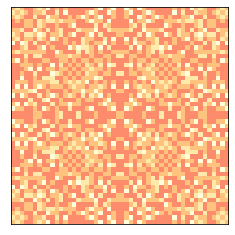

In [2]:
pile = SandPile(n=50, level=30)
pile.run()
pile.draw()

##### Cache or `pickle` regenerated Sand Pile data
Since data generation of `T` and `S` is annoyingly slow in my machine, I cached the result.

In [3]:
def generate_res(pile, iters=100000):
    return [pile.drop_and_run() for _ in range(iters)]


### NOTE: Uncomment the lines below to forcefully generate the result.
# np.random.seed(17)
# res = generate_res(pile, iters=100000)
# pickle.dump(res, open(cache_file, "wb"))

In [4]:
# Get the cached result. If it does not exist, generate the data and cache it.
cache_file = "./cached_data/8-1_data.pickle"
try:
    file = open(cache_file, "rb")
    res = pickle.load(file)
except FileNotFoundError:
    np.random.seed(17)
    res = generate_res(pile, iters=100000)

    # Make the directory the result will be stored in.
    try:
        os.mkdir(os.path.dirname(cache_file))
    except FileExistsError:
        pass

    # Pickle (cache) the result.
    file = open(cache_file, "wb")
    pickle.dump(res, file)
finally:
    file.close()

In [5]:
T, S = np.transpose(res)
T = T[T>1]
S = S[S>0]

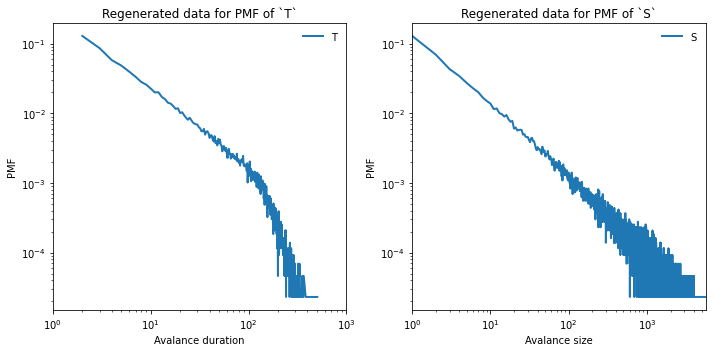

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

Pmf.from_seq(T).plot(label="T")
dec_options = dict(xscale="log", yscale="log", ylabel="PMF")
decorate(xlim=[1, 1000],
         title="Regenerated data for PMF of `T`",
         xlabel="Avalance duration",
         **dec_options)

plt.subplot(1, 2, 2)
Pmf.from_seq(S).plot(label="S")
decorate(xlim=[1, 5600],
         title="Regenerated data for PMF of `S`",
         xlabel="Avalance size",
         **dec_options)

### CDF of `T` and `S`

In [7]:
# Use CDF instead of Pmf
cdfT = Cdf.from_seq(T)
cdfS = Cdf.from_seq(S)

In [8]:
def cdf_plot(cdfT, cdfS, xscale, yscale):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    dec_options = dict(xscale=xscale, yscale=xscale, ylabel="CDF")

    cdfT.plot(label='T')
    decorate(xlim=[1, 1000],
             xlabel="Avalance duration",
             **dec_options)

    plt.subplot(1, 2, 2)
    cdfS.plot(label='S')
    decorate(xlim=[1, 5600],
             xlabel="Avalance size",
             **dec_options)

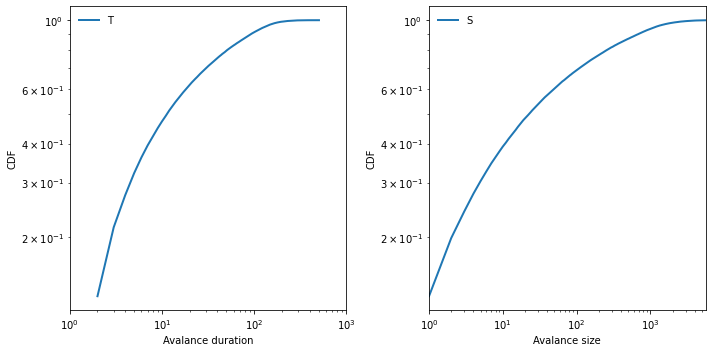

In [9]:
cdf_plot(cdfT, cdfS, xscale="log", yscale="log")

The log-log graph of CDF of `T` and `S` are not straight and therefore may not actually obey the power law.